In [1]:
# Iterative Histogram Based Segmentation

In [2]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

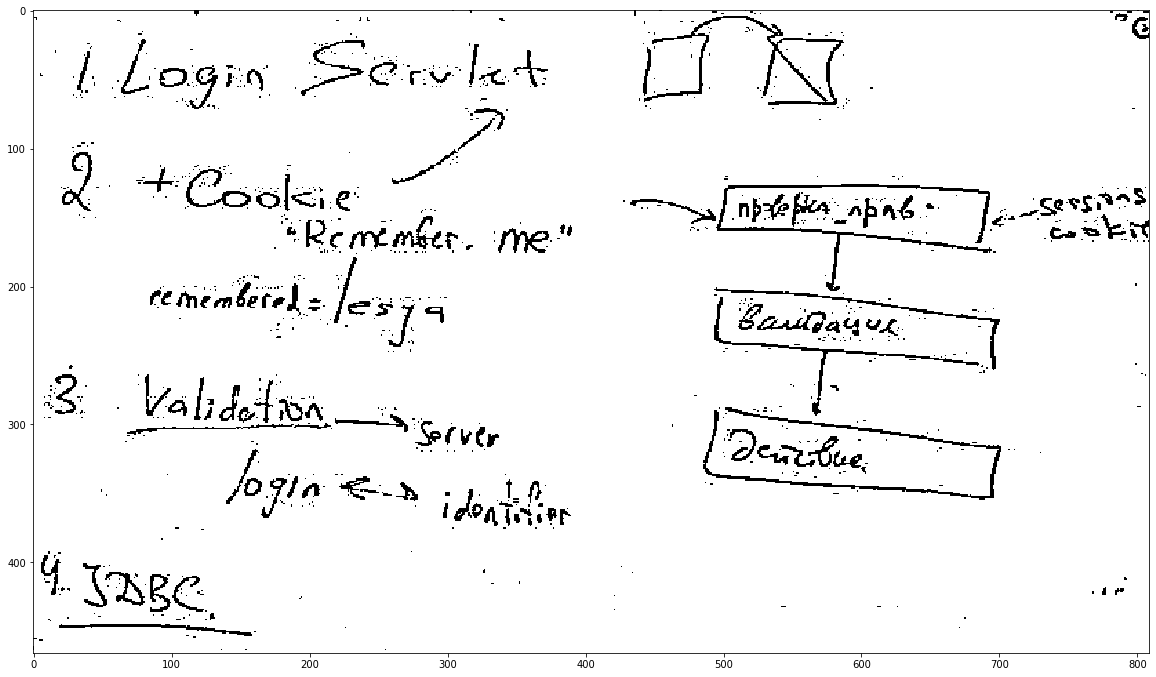

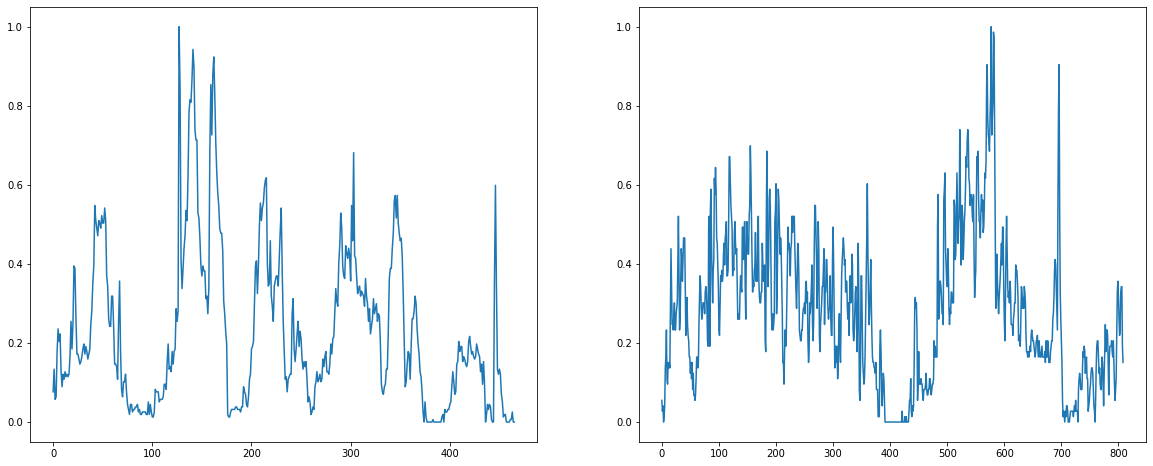

In [11]:
img = cv2.imread('data/cut/photo_2018-09-17_14-18-00.jpg', 0)
th = cv2.adaptiveThreshold(img, 255, cv2.ADAPTIVE_THRESH_GAUSSIAN_C, cv2.THRESH_BINARY, 15, 5)
plt.figure(figsize=(20, 20))
plt.imshow(th, 'gray')

cv2.imwrite('all.png', th)

hist_th = 255 - th

# Горизонтальная гистограмма
x = []
for line in hist_th:
    x.append(np.sum(line))

x = np.array(x)
x = x / np.max(x)

# Вертикальная гистограмма
y = []
for line in hist_th.T:
    y.append(np.sum(line))

y = np.array(y)
y = y / np.max(y)

# Графики
fig, axarr = plt.subplots(nrows=1, ncols=2, sharex=False, figsize=(20, 8))
axarr[0].plot(x)
axarr[1].plot(y)
plt.show()

In [4]:
def segment_vert(img, thresh=0.01, min_len=20):
    # Вертикальная гистограмма
    th = cv2.adaptiveThreshold(img, 255, cv2.ADAPTIVE_THRESH_GAUSSIAN_C, cv2.THRESH_BINARY, 15, 5)
    hist_th = 255 - th
    y = []
    for line in hist_th.T:
        y.append(np.sum(line))

    y = np.array(y)
    y = y / np.max(y)
    
    segments = []
    start = 0
    for k, v in enumerate(y):
        if v < thresh and k - start > min_len:
            segments.append([start, k])
            start = k
    
    segments = [th[:,s[0]:s[1]] for s in segments]
    
    return(segments)

[array([[255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255],
       ...,
       [  0, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255]], dtype=uint8), array([[255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255],
       ...,
       [255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255]], dtype=uint8), array([[255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255],
       ...,
       [255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255]], dtype=uint8), array([[255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 

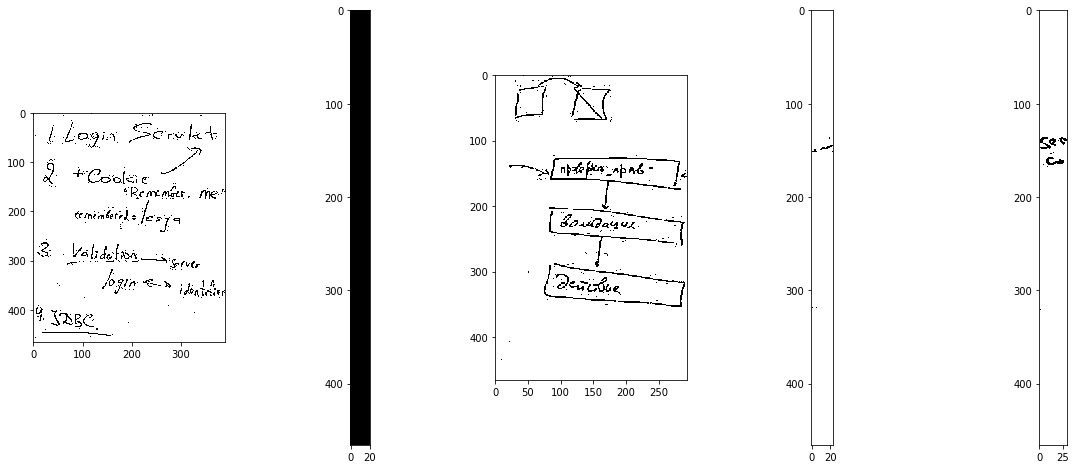

In [5]:
segments = segment_vert(img)
print(segments)
fig, axarr = plt.subplots(nrows=1, ncols=len(segments), sharex=False, figsize=(20, 8))
for k, s in enumerate(segments):
    axarr[k].imshow(s, 'gray')

In [6]:
def segment_hor(img, thresh=0.01, min_len=20):
    # Горизонтальная гистограмма
    th = cv2.adaptiveThreshold(img, 255, cv2.ADAPTIVE_THRESH_GAUSSIAN_C, cv2.THRESH_BINARY, 15, 5)
    hist_th = 255 - th
    x = []
    for line in hist_th:
        x.append(np.sum(line))

    x = np.array(x)
    x = x / np.max(x)
    
    segments = []
    start = 0
    for k, v in enumerate(x):
        if v < thresh and k - start > min_len:
            segments.append([start, k])
            start = k
    
    segments = [th[s[0]:s[1]:, ] for s in segments]
    
    return(segments)

[array([[255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ...,   0,   0,   0],
       [255, 255, 255, ..., 255, 255, 255],
       ...,
       [255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255]], dtype=uint8), array([[255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255],
       ...,
       [255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255]], dtype=uint8), array([[255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255],
       ...,
       [255, 255, 255, ..., 255, 255, 255],
       [  0,   0,   0, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255]], dtype=uint8)]


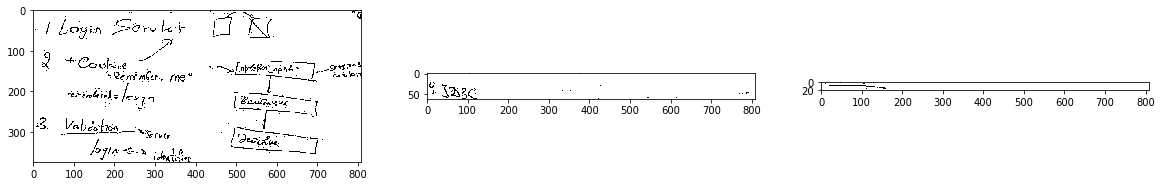

In [7]:
segments = segment_hor(img)
print(segments)
fig, axarr = plt.subplots(nrows=1, ncols=len(segments), sharex=False, figsize=(20, 8))
for k, s in enumerate(segments):
    axarr[k].imshow(s, 'gray')

In [8]:
def iterative_hist_segmentation(img, thresh=0.01, min_len=20):
    vert_segments = []
    hor_segments = []
    # Поочередно приментять вертикальную и горизонтальную сегментаци
    vert_segments = segment_vert(img, thresh, min_len)
    for vs in vert_segments:
        for hs in segment_hor(vs, thresh, min_len):
            hor_segments.append(hs)
    
    return hor_segments

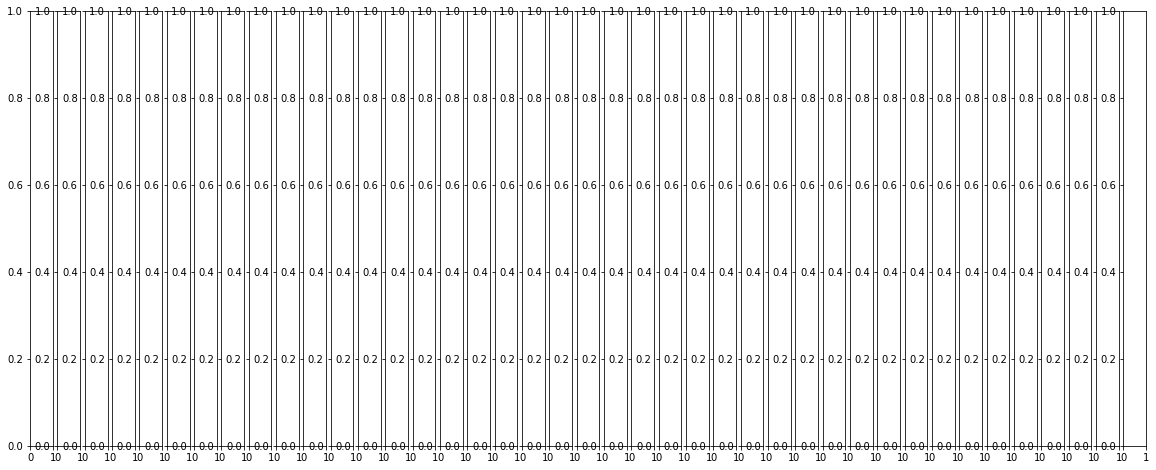

In [9]:
segments = iterative_hist_segmentation(img, min_len=30)
fig, axarr = plt.subplots(nrows=1, ncols=len(segments), sharex=False, figsize=(20, 8))
for k, s in enumerate(segments):
    cv2.imwrite('data/segments/{}.png'.format(k), s)

In [66]:
import os
import pytesseract
from pytesseract import image_to_string
from PIL import Image

pytesseract.pytesseract.tesseract_cmd = r'C:\Users\Eduard\Desktop\Class Board Recognition\Tesseract-OCR\tesseract'

for i in os.listdir('data/segments'):
    text = image_to_string(Image.open('data/segments/{}'.format(i)), lang='eng')
    print(text)

/ Login Serv let

2 (Ga

* Remember

 

 

 

a


 

 




remembered - ke =

 

sf nprte pea aapaé * I

| Sasudday we

|

[denen —


 



ot




Ses


 


 










 



